# Imports and some functions

In [1]:
from WindNet import *
from WindNet import Windnet
train_loader, val_loader, test_loader = import_data(force_reload=False)

## Training parameters

In [11]:
# Training parameter
#Include skip connections?
skip_con = True
#Number of layers
layer = 6
#Embedding size(number of features in the hidden layers)(has to be symmetrical for the skip connections to work)
embedding_siz = 32
epochs = 3
#Learning rate multiplier for the scheduler
lmb = 0.99
#Start learning rate original used was 0.0005, with 0.98^200 it should vary with factor 100.
learning_rate = 0.005

#initialize model
model = Windnet(layers=layer, embedding_size=embedding_siz, skip = skip_con)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()
#Scheduled learning rate, decreases learning rate multiplying by lmb variable every epoch.
lmbda = lambda epoch: lmb
scheduler = SGD.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda= lmbda)   
#Alternative scheduler
#LinearLR(optimizer, start_factor=1, end_factor=0.001, total_iters=epochs)

#Define run version using parameters.
version = f'{layer}-{embedding_siz}-{epochs}-{lmb}-skip{skip_con}'
initialize_weights(model)

history = train(model, train_loader, val_loader, optimizer, loss_fn, epochs=epochs, version=version, sc = scheduler)
# Evaluate on the test set
test_loss, _ = evaluate(model, test_loader, loss_fn)
# print(f'Test Loss: {test_loss:.4f}')
print(f'Version: {version}, Test Loss: {test_loss:.4f}')



Epoch 1/3 completed. Train Loss: 97.7039, Val Loss: 20.1357

Epoch 2/3 completed. Train Loss: 40.1181, Val Loss: 161.0872

Epoch 3/3 completed. Train Loss: 74.2492, Val Loss: 4.0265
{'train_loss': [97.70387186322894, 40.118119427136016, 74.24923319475991], 'val_loss': [20.135651111602783, 161.0872344970703, 4.026495397090912]}

 Training completed! Model saved as WindGNN_6-32-3-0.99-skipTrue.pth
Training history saved as WindGNN_6-32-3-0.99-skipTrue_history.csv
Version: 6-32-3-0.99-skipTrue, Test Loss: 4.0265


# After training: Visualize training loss and model performance

In [5]:
# interpolation_MSEs = []
# for timestamp in suitable_timestamps:
#     data = load_graph_data(timestamp)
#     truth = data.y_dict['truth']
#     truth = truth.unsqueeze(1)
#     _, carra_full = torch.load(intt+f'carra_interpolation_{timestamp}.pt')
#     index = torch.tensor([2])
#     carra = torch.index_select(carra_full, 1, index)
#     carra = torch.mul(carra, 0.05)
#     loss = F.mse_loss(carra, truth)
#     interpolation_MSEs.append(loss.item())

# MSE_average = np.sum(interpolation_MSEs) / len(interpolation_MSEs)
# print(MSE_average)

#Loading a previously saved model

In [6]:
# #If you want to load a previously saved model.
# version = '6-32-200
# model = load_model(model, models+f"WindGNN_{version}.pth")

# # Loading predictions
# predictions, timestamps = test_model(model, test_loader)


# # Load ground truth and CARRA data for prediction timestamps
# truths = []
# carras = []
# for timestamp in timestamps:
#     data = load_graph_data(timestamp)
#     truth = data.y_dict['truth']
#     truth = truth.unsqueeze(1)
#     carra = data.x_dict['carra'][:,0].numpy()
#     carras.append(carra)
#     truths.append(truth)

# history = pd.read_csv(models+f"WindGNN_{version}_history.csv")

In [7]:
#Create csv file with versions saved for loading through models later.
# versions = windgnn+"/versions.csv"
# if not os.path.exists(versions):
#     os.makedirs(versions)
#     print("Creating versions directory")

# #Save the latest version name to csv
# with open(versions, 'w') as f:
#     f.write(version)

Version, layers, embedding size, minimum_training and validation error. \\

crazy_4, 10, 64, train: 0.0026, val: 0.0065

6-32-200, trainmin: 0.00494, valmin: 0.00698

6-64-200, trainmin: 0.00429, valmin: 0.00690

20-64-200, trainmin: 0.00523, valmin: 0.00734

6-128-200, trainmin: 0.00459, valmin: 0.00673

6-128-100-0.975, trainmin: 0.00471, valmin: 0.00690*cant find model

6-128-300-0.99, trainmin: 0.00291, valmin: 0.00681

10-128-300-0.99, trainmin: 0.00209, valmin: 0.00672

10-256-200-0.99, trainmin: 0.00315, valmin: 0.00665

4-32-300-0.99, trainmin: 0.00418, valmin: 0.00662

4-32-100, trainmin: 0.00575, valmin: 0.00777



---



# Plotting a single model

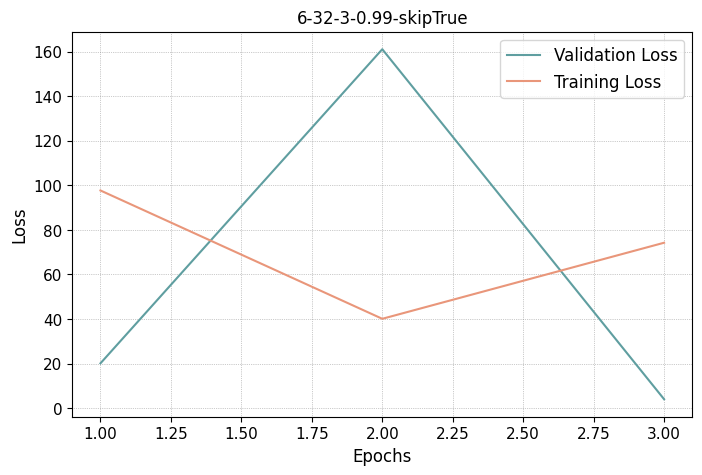

In [13]:

model = Windnet(layers=layer,embedding_size = embedding_siz, skip = True)
model.to(device)
model = load_model(model, models+f"WindGNN_{version}.pth")

history = pd.read_csv(models+f"WindGNN_{version}_history.csv")


# Plot training and validation loss for a given training history
def plot_losses(history, savefig=False, fontsize=12):
    epochs = range(1, len(history['train_loss']) + 1)
    plt.figure(figsize=(8,5))
    # min_train = min(history['train_loss'])
    # min_val = min(history['val_loss'])
    # print(f"{version}, trainmin: {min_train:.5f}, valmin: {min_val:.5f}")
    # diff = history['val_loss'] + 0.5*(np.abs(history['val_loss'] - history['train_loss']))
    # print(f"Convergence in epoch {25+np.argmin(diff[25:])}")
    # Plot training and validation losses
    plt.plot(epochs, history['val_loss'], label='Validation Loss', color='cadetblue')
    plt.plot(epochs, history['train_loss'], label='Training Loss', color='darksalmon')
    # plt.plot(epochs, diff, label = 'weighted difference')
    # plt.plot(epochs, history['MSE_loss'], label='MSE Validation for comparison', color='orchid')

    # Plot axis labels and legend
    # plt.ylim(0.004, 0.01)
    plt.xlabel('Epochs', fontsize=fontsize)
    plt.ylabel('Loss', fontsize=fontsize)
    plt.legend(loc='upper right', fontsize=fontsize)

    # Add grid with gray dotted lines
    plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.8)

    # Increase the font size of tick marks
    plt.xticks(fontsize=fontsize-1)
    plt.yticks(fontsize=fontsize-1)
    plt.title(version)

    if savefig:
        plt.savefig(images+f'WindGNN_{version}_loss.pdf', bbox_inches='tight')
        plt.savefig(images+f'WindGNN_{version}.png', bbox_inches='tight', dpi=300)
    plt.show()

versions = ['6-32-200','6-64-200','20-64-200','6-128-200','6-128-300-0.99','10-128-300-0.99','10-256-200-0.99']



plot_losses(history, savefig=True)

# Below isn't really used, but kept in case it might be useful later.




In [9]:
def plot_map(fontsize, left=False):
    m = Basemap(projection='merc',
                llcrnrlat=71.086, urcrnrlat=71.535,
                llcrnrlon=21.549, urcrnrlon=22.951,
                resolution='i')
    # Outer edges of the output grid are:
    # 71.086621  21.549128
    # 71.535779  22.950872

    m.drawmapboundary(fill_color='steelblue')
    if left:
        m.drawparallels(np.arange(-90., 91., .2), labels=[1, 0, 0, 0], fontsize=fontsize, color='white', alpha=0.5)
    else:
        m.drawparallels(np.arange(-90., 91., .2), labels=[0, 0, 0, 0], color='white', alpha=0.5)
    m.drawmeridians(np.arange(-180., 181., .5), labels=[0, 0, 0, 1], fontsize=fontsize, color='white', alpha=0.5)
    return m

def plot_colourbar(fontsize, sc):
    cax = plt.axes((0.99, 0, 0.01, 1))
    cbar = plt.colorbar(sc, label='wind speed', cax=cax)
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.set_label('wind speed [m/s]', fontsize=fontsize)
    pass

# Plot a predicted wind field next to its ground truth
def visualize_predictions_vs_truth(carra, prediction, truth, fontsize=15, filename=None):
    lats = output_grid['lat']
    lons = output_grid['lon']

    lats_CARRA = carra_grid['lat']
    lons_CARRA = carra_grid['lon']

    plt.figure(figsize=(16, 5))

    #============================================================================================
    # First subplot
    plt.subplot(1, 3, 1)
    m = plot_map(fontsize, left=True)

    x_CARRA, y_CARRA = m(lons_CARRA, lats_CARRA)
    x, y = m(lons, lats)
    x_Gol, y_Gol = m(Goliat_lon, Goliat_lat)

    # Plot the original CARRA wind field
    sc = plt.scatter(x_CARRA, y_CARRA, c=carra, cmap=cmap, marker=(4,0,80), s=520)
    plt.clim(0, 1)
    plt.title('CARRA wind field', fontsize=fontsize)

    # Display Goliat station
    m.scatter(x_Gol, y_Gol, marker=".", color='indianred', s=250, alpha=1, edgecolor='k', label='Goliat station')
    plt.legend(loc='upper right', fontsize=fontsize)
    plt.tight_layout()

    #============================================================================================
    # Second subplot
    plt.subplot(1, 3, 2)
    m = plot_map(fontsize)

    # Plot the wind field as predicted by the model
    sc = plt.scatter(x, y, c=prediction, cmap=cmap, marker='s', s=42)
    plt.clim(0, 1)
    plt.title('predicted wind field', fontsize=fontsize)

    # Display Goliat station
    m.scatter(x_Gol, y_Gol, marker=".", color='indianred', s=250, alpha=1, edgecolor='k', label='Goliat station')
    plt.legend(loc='upper right', fontsize=fontsize)
    #plt.tight_layout()

    #============================================================================================
    # Third subplot
    plt.subplot(1, 3, 3)
    m = plot_map(fontsize)

    # Plot the true wind field as interpolated from Sentinel-1
    sc = plt.scatter(x, y, c=truth, cmap=cmap, marker='s', s=42)
    plt.clim(0, 1)
    plt.title('true wind field (SAR interpolation)', fontsize=fontsize)

    # Display Goliat station
    m.scatter(x_Gol, y_Gol, marker=".", color='indianred', s=250, alpha=1, edgecolor='k', label='Goliat station')
    plt.legend(loc='upper right', fontsize=fontsize)
    plt.tight_layout()

    plt.subplots_adjust(left=0, bottom=0, right=0.97, top=1, wspace=0.05, hspace=None)

    # Plot colourbar
    plot_colourbar(fontsize, sc)

    if filename:
        plt.savefig(f"{filename}.pdf", bbox_inches='tight')
        plt.savefig(f"{filename}.png", bbox_inches='tight', dpi=300)
    plt.show()

def plot_distributions(carra, prediction, truth, fontsize=15, filename=None):
    plt.figure(figsize=(16, 3.5))

    bins = np.linspace(0, 1, 100)

    carra_mean = np.average(carra)
    carra_std = np.std(carra)

    plt.subplot(1,3,1)
    plt.hist(carra, bins=bins, color='cornflowerblue')
    plt.title('CARRA wind speed', fontsize=fontsize)
    plt.xlabel('wind speed (normalized)', fontsize=fontsize)
    plt.ylabel('frequency', fontsize=fontsize)
    plt.xticks(fontsize=fontsize-2)
    plt.yticks(fontsize=fontsize-2)
    plt.text(0.63, 3, f"mean = {carra_mean:.3f}\nstd = {carra_std:.4f}",
             fontsize=fontsize-2, backgroundcolor='white')
    plt.grid(alpha=0.7, linestyle='dotted')

    prediction_mean = np.average(prediction)
    prediction_std = np.std(prediction)

    plt.subplot(1,3,2)
    plt.hist(prediction, bins=bins, color='darksalmon')
    plt.title('predicted wind speed', fontsize=fontsize)
    plt.xlabel('wind speed (normalized)', fontsize=fontsize)
    plt.ylabel('frequency', fontsize=fontsize)
    plt.xticks(fontsize=fontsize-2)
    plt.yticks(fontsize=fontsize-2)
    plt.text(0.63, 20, f"mean = {prediction_mean:.3f}\nstd = {prediction_std:.4f}",
             fontsize=fontsize-2, backgroundcolor='white')
    plt.grid(alpha=0.7, linestyle='dotted')

    truth_mean = np.average(truth)
    truth_std = np.std(truth)

    plt.subplot(1,3,3)
    plt.hist(truth, bins=bins, color='cadetblue')
    plt.title('true wind speed', fontsize=fontsize)
    plt.xlabel('wind speed (normalized)', fontsize=fontsize)
    plt.ylabel('frequency', fontsize=fontsize)
    plt.xticks(fontsize=fontsize-2)
    plt.yticks(fontsize=fontsize-2)
    plt.text(0.63, 20, f"mean = {truth_mean:.3f}\nstd = {truth_std:.4f}",
             fontsize=fontsize-2, backgroundcolor='white')
    plt.grid(alpha=0.7, linestyle='dotted')

    plt.tight_layout
    plt.show()

    return truth_mean - carra_mean, truth_mean - prediction_mean, truth_std - carra_std, truth_std - prediction_std

def mask_carra(carra):
    min_lon, max_lon = [min(output_grid['lon']), max(output_grid['lon'])]
    min_lat, max_lat = [min(output_grid['lat']), max(output_grid['lat'])]

    # Create boolean masks for longitude and latitude
    lon_mask = (carra_grid['lon'] >= min_lon) & (carra_grid['lon'] <= max_lon)
    lat_mask = (carra_grid['lat'] >= min_lat) & (carra_grid['lat'] <= max_lat)

    # Combine the masks to get the final mask
    final_mask = lon_mask & lat_mask

    # Apply the mask to the DataFrame
    carra = carra[final_mask]
    return carra

cmap = 'plasma'
mean_diffs_carra = []
mean_diffs_pred = []
std_diffs_carra = []
std_diffs_pred = []
for i in range(len(predictions)):
    print(timestamps[i])

    #visualize_predictions_vs_truth(carras[i], predictions[i], truths[i].numpy())#, filename=f'WindGNN_{version}_prediction_{i}')
    mean_diff_carra, mean_diff_pred, std_diff_carra, std_diff_pred = plot_distributions(mask_carra(carras[i]), predictions[i], truths[i].numpy())
    mean_diffs_carra.append(mean_diff_carra)
    mean_diffs_pred.append(mean_diff_pred)
    std_diffs_carra.append(std_diff_carra)
    std_diffs_pred.append(std_diff_pred)

bins_mean = np.linspace(-0.25, 0.15, 30)
plt.figure(figsize=(7,4))
plt.hist(mean_diffs_carra, bins=bins_mean, alpha=0.7, color='cornflowerblue', label='truth - CARRA')
plt.hist(mean_diffs_pred, bins=bins_mean, alpha=0.7, color='darksalmon', label = 'truth - prediction')
plt.xlabel('difference in mean wind speed (normalized)', fontsize=11)
plt.ylabel('frequency', fontsize=11)
plt.grid(alpha=0.7, linestyle='dotted')
plt.axvline(x=0, color='gray')
plt.legend(loc='upper left')
plt.savefig('WindGNN_06-2_mean-differences.pdf', bbox_inches='tight')
plt.savefig('WindGNN_06-2_mean-differences.png', bbox_inches='tight', dpi=300)
plt.show()

bins_std = np.linspace(-0.05, 0.06, 30)
plt.figure(figsize=(7,4))
plt.hist(std_diffs_carra, bins=bins_std, alpha=0.7, color='cornflowerblue', label='truth - CARRA')
plt.hist(std_diffs_pred, bins=bins_std, alpha=0.7, color='darksalmon', label='truth - prediction')
plt.xlabel('difference in wind speed std. deviation (normalized)', fontsize=11)
plt.ylabel('frequency', fontsize=11)
plt.grid(alpha=0.7, linestyle='dotted')
plt.axvline(x=0, color='gray')
plt.legend(loc='upper left')
plt.savefig('WindGNN_06-2_std-differences.pdf', bbox_inches='tight')
plt.savefig('WindGNN_06-2_std-differences.png', bbox_inches='tight', dpi=300)
plt.show()

NameError: name 'predictions' is not defined